# Parsing Demo Files
In this Jupyter Notebook, we show how to use the `csgo` package to parse Counter-Strike: Global Offensive demofiles. In many competitive matches, such as those on [HLTV](www.hltv.org), a demofile is kept of all the events that occur on the server during the match. This includes things such as round starts and ends, damages, kills and even finer grained events such as weapon firings and footsteps.

In [1]:
import sys  
sys.path.insert(0, "..")

import csgo

Next, we import the `CSGOMatchParser` object. This object is created by providing the demo file (ending in `.dem`) and a log file path as arguments. To instantiate the parser, we can simply call `parser = CSGOMatchParser(demofile = ..., logpath = ...)`.

In [2]:
from csgo.parser.match_parser import CSGOMatchParser

parser = CSGOMatchParser(demofile = "vitality-vs-natus-vincere-m1-dust2.dem", logfile="parser_log.log")

To parse the demofile, we conduct three steps. 

- (1) We run the `parse_demofile()` method, which parses the demo file using our Go backend. The parsed text is then written to parser.parsed_text. Each event is contained in a "cell", which looks like `[... event info ...]`
- (2) Then, we find the match start time using `find_match_start()` method. If we get a weird match start, it is likely that the demo file is corrupted in some way, and the match start (found in the `.match_start` attribute) will be 0.
- (3) Finally, we run `parse_match()`, which loops through the cells in `.parsed_text` and output the data into a collection of lists

In [3]:
parser.parse_demofile()
parser.find_match_start()
parser.parse_match()

We currently provide the ability to parse information on the following events:

- Rounds
- Kills
- Damages
- Footsteps

To get this information in Pandas dataframe format, we can use the `write_` methods, as shown below.

In [4]:
parser.write_footsteps()
parser.write_damages()
parser.write_kills()
parser.write_rounds()

In [5]:
import matplotlib.pyplot as plt
from csgo.visualization.plot import plot_trajectory, plot_kills

plt.rcParams['figure.figsize'] = [15, 15]

footstep_df = parser.footstep_df
shox_round_seven = footstep_df.query("PlayerName == 'shox' & RoundNum == 14")
plot_trajectory(shox_round_seven, "de_dust2")

plt.show()

<Figure size 1500x1500 with 1 Axes>

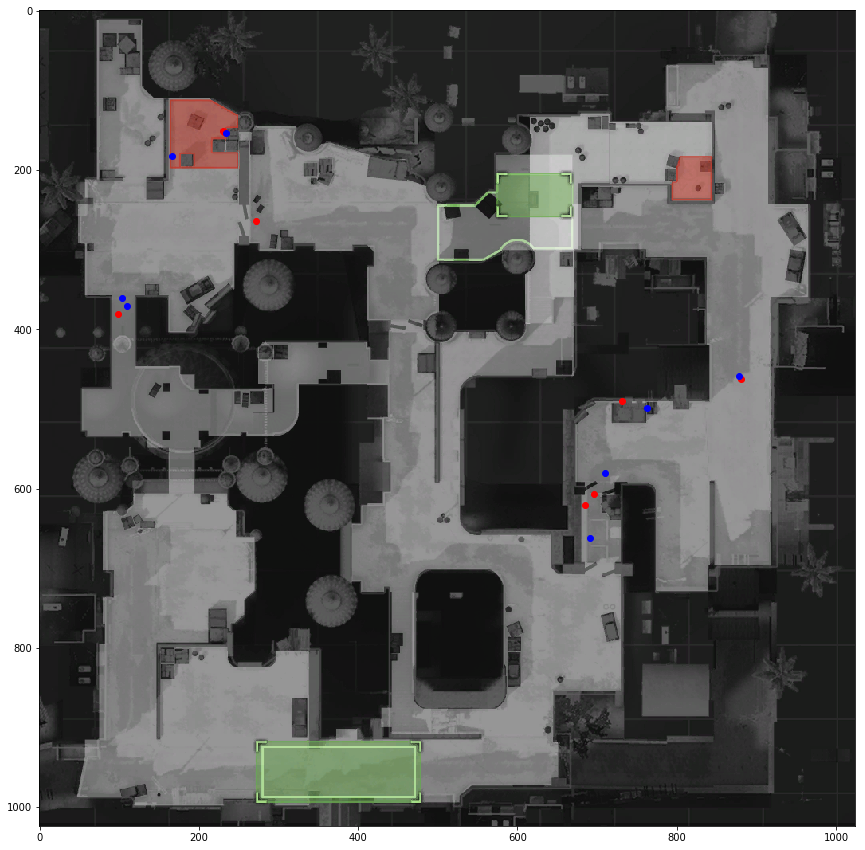

In [6]:
plt.rcParams['figure.figsize'] = [15, 15]

kills_df = parser.kills_df
round_eight_kills = kills_df.query("RoundNum == 7")
plot_kills(round_eight_kills, "de_dust2")
plt.show()

In [7]:
round_eight_kills

,MatchName,MapName,RoundNum,Tick,VictimX,VictimY,VictimZ,VictimXViz,VictimYViz,VictimViewX,...,VictimSide,VictimTeamEqVal,AttackerID,AttackerName,AttackerTeam,AttackerSide,AttackerTeamEqVal,WeaponID,IsWallshot,IsHeadshot
45,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,115707,579.559753,438.536530,3.598715,694.445399,636.468971,76.624146,...,T,27350,76561198146207066,Boombl4,Natus Vincere,CT,32600,M4A4,0,0
46,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,115932,894.472717,1156.475342,123.031250,766.016527,473.301059,241.572876,...,CT,32600,76561198014251501,RpK,Vitality,T,27350,SG556,0,1
47,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,116230,663.847351,797.851440,0.255459,713.601671,554.806491,35.205688,...,T,27350,76561198044045107,electronic,Natus Vincere,CT,32600,M4A4,0,0
48,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,116304,1404.268433,1336.090698,-11.244177,881.879189,432.479387,208.311768,...,CT,32600,76561197989744167,apEX,Vitality,T,27350,AK47,0,0
49,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,121811,-2003.906128,1768.456543,31.927803,107.294062,334.214422,58.117676,...,T,27350,76561198116523276,flamie,Natus Vincere,CT,32600,SG556,0,1
50,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,122116,-1978.309326,1719.540649,32.185814,113.111517,345.331671,60.825806,...,T,27350,76561198116523276,flamie,Natus Vincere,CT,32600,SG556,0,0
51,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,122251,-1430.006592,2676.153564,16.377335,237.725775,127.919644,239.139404,...,CT,32600,76561198004871434,ALEX,Vitality,T,27350,SG556,0,0
52,vitality-vs-natus-vincere-m1-dust2,de_dust2,7,123808,-1728.839600,2548.755859,66.031250,169.809182,156.873668,322.586060,...,T,26950,76561198034202275,s1mple,Natus Vincere,CT,32600,AWP,0,0
